In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition

## a. Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range

In [35]:
SegData = pd.read_csv(r"C:\Users\Owner\Documents\DSC 478\segmentation_data.txt", header = None)
SegData.head

<bound method NDFrame.head of          0      1   2         3    4         5         6         7         8   \
0     110.0  189.0   9  0.000000  0.0  1.000000  0.666667  1.222222  1.186342   
1      86.0  187.0   9  0.000000  0.0  1.111111  0.720082  1.444444  0.750309   
2     225.0  244.0   9  0.000000  0.0  3.388889  2.195113  3.000000  1.520234   
3      47.0  232.0   9  0.000000  0.0  1.277778  1.254621  1.000000  0.894427   
4      97.0  186.0   9  0.000000  0.0  1.166667  0.691215  1.166667  1.005540   
...     ...    ...  ..       ...  ...       ...       ...       ...       ...   
2095   32.0  158.0   9  0.000000  0.0  0.944445  0.862963  0.833333  0.611111   
2096    8.0  162.0   9  0.111111  0.0  1.611111  2.062962  0.333333  0.133333   
2097  128.0  161.0   9  0.000000  0.0  0.555555  0.251852  0.777778  0.162963   
2098  150.0  158.0   9  0.000000  0.0  2.166667  1.633334  1.388889  0.418518   
2099  124.0  162.0   9  0.111111  0.0  1.388889  1.129630  2.000000  0.888889  

In [36]:

SegClass = pd.read_csv(r"C:\Users\Owner\Documents\DSC 478\segmentation_classes.txt", header = None, sep = '\t', names = ['Name','Value'])
SegClass.head()

,Name,Value
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [37]:

x_train = np.array(SegData)

In [38]:
SegNames = pd.read_csv(r"C:\Users\Owner\Documents\DSC 478\segmentation_names.txt", header = None)
SegNames

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2
5,VEDGE-MEAN
6,VEDGE-SD
7,HEDGE-MEAN
8,HEDGE-SD
9,INTENSITY-MEAN


In [39]:
min_max_scaler = preprocessing.MinMaxScaler().fit(SegData)
s_data_norm = min_max_scaler.transform(SegData)
s_data_norm

array([[0.43, 0.74, 0.  , ..., 0.12, 0.51, 0.83],
       [0.34, 0.73, 0.  , ..., 0.13, 0.46, 0.84],
       [0.89, 0.97, 0.  , ..., 0.11, 0.48, 0.84],
       ...,
       [0.5 , 0.62, 0.  , ..., 0.07, 0.54, 0.18],
       [0.59, 0.61, 0.  , ..., 0.08, 0.5 , 0.18],
       [0.49, 0.63, 0.  , ..., 0.1 , 0.48, 0.17]])

## b. Next, Perform Kmeans clustering (for this problem, use the Kmeans implementation in scikit-learn) on the image data (since there are a total 7 pre-assigned image classes, you should use K = 7 in your clustering). Use Euclidean distance as your distance measure for the clustering. Print the cluster centroids (use some formatting so that they are visually understandable). Compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.¶


In [40]:
from sklearn.cluster import KMeans

kMeans = KMeans(n_clusters = 7)

In [41]:
kMeans.fit(s_data_norm)

KMeans(n_clusters=7)

In [42]:
kMeans.labels_

array([5, 5, 4, ..., 3, 3, 0])

In [43]:
kMeans.cluster_centers_

array([[0.21, 0.42, 0.  , 0.06, 0.02, 0.06, 0.  , 0.05, 0.  , 0.09, 0.08,
        0.12, 0.07, 0.75, 0.28, 0.42, 0.12, 0.56, 0.2 ],
       [0.54, 0.15, 0.  , 0.03, 0.  , 0.03, 0.  , 0.03, 0.  , 0.82, 0.78,
        0.89, 0.79, 0.27, 0.67, 0.29, 0.89, 0.21, 0.13],
       [0.74, 0.52, 0.  , 0.04, 0.04, 0.11, 0.02, 0.1 , 0.02, 0.29, 0.26,
        0.34, 0.25, 0.6 , 0.44, 0.32, 0.34, 0.31, 0.17],
       [0.7 , 0.43, 0.  , 0.01, 0.02, 0.04, 0.  , 0.02, 0.  , 0.04, 0.03,
        0.06, 0.02, 0.77, 0.23, 0.49, 0.06, 0.7 , 0.19],
       [0.78, 0.73, 0.  , 0.07, 0.01, 0.04, 0.  , 0.04, 0.  , 0.08, 0.07,
        0.07, 0.11, 0.71, 0.09, 0.77, 0.11, 0.33, 0.82],
       [0.29, 0.82, 0.  , 0.07, 0.  , 0.06, 0.  , 0.05, 0.  , 0.11, 0.09,
        0.09, 0.14, 0.68, 0.07, 0.82, 0.14, 0.41, 0.89],
       [0.3 , 0.53, 0.  , 0.05, 0.04, 0.11, 0.01, 0.09, 0.01, 0.39, 0.36,
        0.46, 0.34, 0.51, 0.56, 0.22, 0.46, 0.3 , 0.16]])

In [44]:
pd.DataFrame(kMeans.cluster_centers_.T, index = SegNames, columns = ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5',' Cluster 6','Cluster 7'])


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
"(REGION-CENTROID-COL,)",0.213105,0.535099,0.735167,0.702216,0.775046,0.285321,0.301520
"(REGION-CENTROID-ROW,)",0.415349,0.150167,0.515328,0.431349,0.734200,0.820833,0.529343
"(REGION-PIXEL-COUNT,)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(SHORT-LINE-DENSITY-5,)",0.058939,0.027778,0.044321,0.012897,0.069364,0.068323,0.047436
"(SHORT-LINE-DENSITY-2,)",0.018664,0.001667,0.036011,0.022321,0.005780,0.003106,0.042308
"(VEDGE-MEAN,)",0.058200,0.030228,0.108591,0.040682,0.040847,0.056597,0.108226
"(VEDGE-SD,)",0.003649,0.000543,0.017546,0.002971,0.000961,0.001563,0.008912
"(HEDGE-MEAN,)",0.047469,0.026766,0.101227,0.024933,0.035623,0.047197,0.085155
"(HEDGE-SD,)",0.003833,0.000587,0.016658,0.002190,0.001060,0.001446,0.010311
"(INTENSITY-MEAN,)",0.090886,0.823246,0.285093,0.036642,0.084752,0.109619,0.390750


In [45]:
from sklearn.metrics import completeness_score, homogeneity_score
c_score = completeness_score(SegClass['Value'], kMeans.labels_)
print(c_score)

0.5854447686577433


In [46]:
h_score = homogeneity_score(SegClass['Value'], kMeans.labels_)
print(h_score)

0.5652540023720359


## 2C Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Then use these r components as features to transform the data into a reduced dimension space. 


In [47]:
pca = decomposition.PCA(n_components=10)


In [48]:
imageTrans = pca.fit(s_data_norm).transform(s_data_norm)

In [49]:
print(pca.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01]


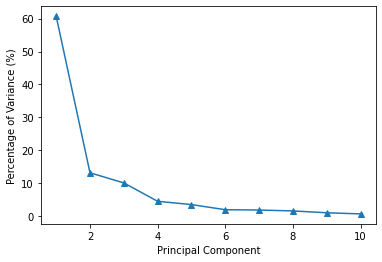

In [50]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), pca.explained_variance_ratio_*100, marker='^')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance (%)')
plt.show()

In [51]:

pc = 0
total_var = 0
for i in pca.explained_variance_ratio_:
    pc += 1
    total_var += i*100
    print("Variance captured by PC " + str(pc) + ": " + str(total_var))

Variance captured by PC 1: 60.714233968533236
Variance captured by PC 2: 73.91121320168921
Variance captured by PC 3: 84.03498614256182
Variance captured by PC 4: 88.57852534332577
Variance captured by PC 5: 92.1258864810956
Variance captured by PC 6: 94.11392197960615
Variance captured by PC 7: 96.00589227704948
Variance captured by PC 8: 97.62130108194508
Variance captured by PC 9: 98.68690193362023
Variance captured by PC 10: 99.39823945149524


In [52]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 4)
dtrans = pca.fit(x_train).transform(x_train)
np.set_printoptions(precision = 2, suppress = True)
print(dtrans)

[[-84.65  -4.43  -8.88 -39.01]
 [-84.35 -28.54  -7.58 -39.77]
 [-96.16 115.47 -17.9  -78.9 ]
 ...
 [-78.74  10.28  -9.03  -5.84]
 [-72.94  31.66  -9.31  -2.43]
 [-72.7    6.09  -7.91  -9.9 ]]


In [53]:
print(pca.explained_variance_ratio_)

[0.42 0.24 0.19 0.1 ]


## 2D  Perform Kmeans again, but this time on the lower dimensional transformed data. Then, compute the Completeness and Homogeneity values of the new clusters.


In [54]:
kMeans.fit(dtrans)

KMeans(n_clusters=7)

In [55]:
kMeans.labels_


array([4, 4, 5, ..., 4, 0, 4])

In [56]:
kMeans.cluster_centers_


array([[-31.26,  66.08,  -4.57,  40.56],
       [ 31.7 , -42.26,  -4.42, -38.43],
       [208.93,  52.22, -16.48,   4.31],
       [ 53.37,  50.85, 731.15, -14.24],
       [-62.15, -63.52,   1.74,  12.5 ],
       [-37.56,  67.19,  -7.91, -53.24],
       [190.04, -71.45,  -7.99,  -3.92]])

In [57]:
pd.DataFrame(kMeans.cluster_centers_.T, index = ['PC 1', 'PC 2', 'PC 3', 'PC 4'], columns = ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5',' Cluster 6','Cluster 7'])

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
PC 1,-31.263496,31.702855,208.933704,53.372838,-62.145989,-37.555311,190.044366
PC 2,66.078910,-42.255552,52.221908,50.849308,-63.524596,67.186841,-71.446022
PC 3,-4.565757,-4.415894,-16.484504,731.147334,1.738956,-7.912924,-7.986007
PC 4,40.564668,-38.428380,4.309670,-14.240077,12.498216,-53.235570,-3.915106


In [58]:
c_score = completeness_score(SegClass['Value'], kMeans.labels_)
print(c_score)

0.532035429866375


In [59]:
h_score = homogeneity_score(SegClass['Value'], kMeans.labels_)
print(h_score)

0.4576738586339517


## e. Discuss your observations based on the comparison of the two clustering results.¶
When we do kMeans clustering on a normalized dataset the completeness and homogeneity we get is: Completeness of Cluster: 0.585 Homogeneity of Clusters: 0.565

When we do kMeans clustering on a datatset with reduced uncorrelated features generated by PCA, which captures 95% of the variance in the data, the completeness and homogeneity we get is: Completeness of Cluster: 0.532 Homogeneity of Clusters: 0.458

So the results are almost similar and there is no significant difference in completeness and homogeneity of clusters. Since the second approach, in which we reduce the number of features using PCA and still account for the most of the variance in the data, gives the same result as the earlier approach, I would suggest using PCA and then clustering as that would reduce the computation effort required by KMeans algorithm as the number of features are reduced to 4 and still explained 95% of the variance.